# Working with Chest x rays to identify Pneumonia

For this exercice we will be working with a dataset uploaded from Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

Let's explore the data.

In [3]:
#Basic uploads
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread #to read image from

import seaborn as sns
import os
%matplotlib inline


## Exploring the Data

Original Data source:
Dataset containg three folders ['test', 'train', 'val']. Each folder contains 2 folders ['PNEUMONIA', 'NORMAL']. 

Number of Train samples : (3875, Pneumonia)(1341, Normla) - 5216

Number of Test samples: (390, Pneumonia)(234, Normla) - 624

Number of val samples: (8, Pneumonia)(8, Normla) - 16

In [8]:
path_to_data = '/Users/flatironschool/Documents/flatiron/Mod_4_Andres_Mendel/Data/chest_xray'

In [10]:
# chequin what is inside the chest_xray directory
os.listdir(path_to_data)

['test', 'train', 'val']

In [13]:
os.listdir(path_to_data+'/test')

['PNEUMONIA', 'NORMAL']

In [88]:
#Number of xrays with pneumonia in the test 
len(os.listdir(path_to_data+'/train/PNEUMONIA'))
#os.listdir(path_to_data+'/train/PNEUMONIA')

3875

In [22]:
#Number of normal xrays
len(os.listdir(path_to_data+'/train/NORMAL'))

1341

### Visualizing the data


In [131]:
#Getting the first normal/sick xray
normal_img_path = path_to_data+'/train/NORMAL'
os.listdir(normal_img_path)[0]
sick_img_path = path_to_data+'/train/PNEUMONIA'
os.listdir(sick_img_path)[0]

'person63_bacteria_306.jpeg'

In [132]:
norm_img = imread(normal_img_path+'/NORMAL2-IM-0927-0001.jpeg')
sick_img = imread(sick_img_path+'/person63_bacteria_306.jpeg')

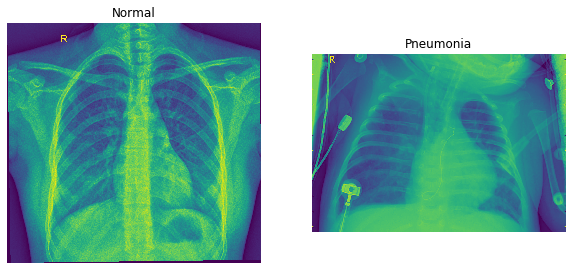

In [133]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(norm_img)
ax1.set_title('Normal')
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(sick_img)
ax2.set_title('Pneumonia')
plt.axis('off');

### Geting a sence of the diference in images sizes

In [64]:
norm_img.shape

(2234, 2359)

In [65]:
sick_img.shape

(736, 1048)

In [77]:
sick_img_path

'/Users/flatironschool/Documents/flatiron/Mod_4_Andres_Mendel/Data/chest_xray/train/PNEUMONIA'

In [87]:
dim = []
for image_filename in os.listdir(sick_img_path):
    
    img = imread(sick_img_path+'/'+image_filename)
    dim.append(img.shape)

In [137]:
dim

[(736, 1048),
 (672, 984),
 (712, 992),
 (888, 1224),
 (480, 864),
 (584, 944),
 (1110, 1816),
 (1024, 1408),
 (552, 1200),
 (1256, 1336),
 (1040, 1400),
 (608, 1016),
 (936, 1360),
 (1056, 1576),
 (560, 850, 3),
 (866, 1186),
 (600, 976),
 (528, 872),
 (920, 1264),
 (912, 1368),
 (712, 1192),
 (576, 936),
 (656, 1224),
 (728, 1240),
 (560, 976),
 (632, 1064),
 (127, 384, 3),
 (1008, 1136),
 (808, 1184),
 (624, 1096),
 (608, 1008),
 (867, 1302),
 (848, 1206),
 (1288, 1624),
 (1024, 1376),
 (784, 1280),
 (1088, 1384),
 (536, 888),
 (784, 1176),
 (1112, 1576),
 (896, 1400),
 (537, 711, 3),
 (728, 1208),
 (1187, 1690),
 (872, 1112),
 (928, 1368),
 (832, 1296),
 (1056, 1504),
 (584, 1080),
 (1048, 1656),
 (704, 1184),
 (1052, 1526),
 (552, 768, 3),
 (844, 1164),
 (840, 1368),
 (704, 912),
 (784, 1096),
 (808, 1120),
 (712, 1312),
 (888, 1448),
 (960, 1256),
 (800, 952),
 (824, 1024),
 (1112, 1440),
 (653, 1287, 3),
 (880, 1232),
 (960, 1160),
 (720, 976),
 (704, 1112),
 (424, 936),
 (632, 

In [102]:
x_dim =[]
y_dim =[]
for img_tuple in dim:
    x_dim.append(img_tuple[0])
    y_dim.append(img_tuple[1])


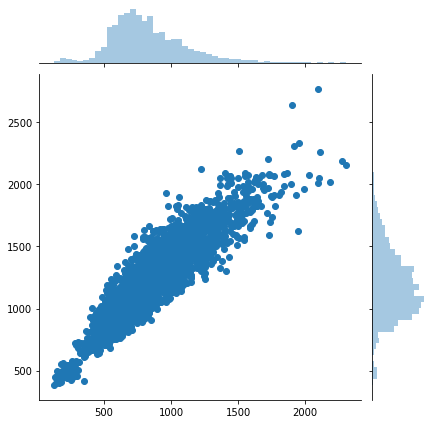

In [103]:
sns.jointplot(x_dim, y_dim);

### From RGB to Grayscale

From the exploration above image 14 is RGB type

In [138]:
os.listdir(sick_img_path)[14]

'person69_bacteria_338.jpeg'

TypeError: Image data of dtype <U119 cannot be converted to float

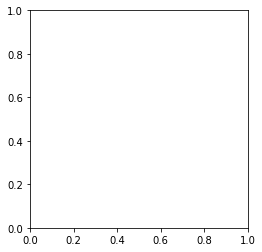

In [154]:
plt.imshow(sick_img_path+'/person69_bacteria_338.jpeg');


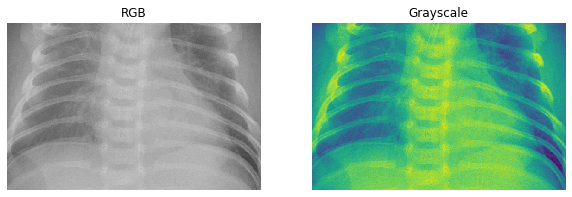

In [156]:
def rgb2gray(rgb):
    """
    Transforms RGB to Grayscale (x,y,colors) -> (x,y)
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = imread(sick_img_path+'/person69_bacteria_338.jpeg')     
gray = rgb2gray(img)    


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img)
ax1.set_title('RGB')
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(gray)
ax2.set_title('Grayscale')
plt.axis('off');

### ImageDataGenerator
Generate batches of tensor image data with real-time data augmentation.

The data will be looped over (in batches).

## Dataset preprocessing
Keras dataset preprocessing utilities, located at `tf.keras.preprocessing`, help you go from raw data on disk to a tf.data.Dataset object that can be used to train a model.

The data folder that looks like this:

`
Data/
   NORMAL/
      a_image_1.jpg
      a_image_2.jpg
   PNEUMONIA/
      b_image_1.jpg
      b_image_2.jpg
`

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [123]:
help(ImageDataGenerator)


Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0